In [6]:
# Import necessary libraries
!pip install geopandas pandas numpy matplotlib seaborn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [7]:
# Set the working directory and verify it
os.chdir("D:\\Assignments_SCMA632")
print(os.getcwd())

# Reading the file into Python
data = pd.read_csv("NSSO68.csv")

D:\Assignments_SCMA632


C:\Users\jyoth\AppData\Local\Temp\ipykernel_6908\617625527.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("NSSO68.csv")


In [8]:
# a) Plotting a histogram and a barplot of the data to indicate the consumption district-wise for West Bengal

# Filtering for WB
df = data[data['state_1'] == "MANPR"]

# Display dataset info
print("Dataset Information:")
print(df.columns)
print(df.head())
print(df.shape)

Dataset Information:
Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
        slno                                 grp  Round_Centre  FSU_number  \
16453  16454  44399999999999999644387445309440.0             1       44419   
16454  16455  44399999999999999644387445309440.0             1       44419   
16455  16456  44399999999999999644387445309440.0             1       44419   
16456  16457  44399999999999999644387445309440.0             1       44419   
16457  16458  44399999999999999644387445309440.0             1       44419   

       Round  Schedule_Number  Sample  Sector  state  State_Region  ...  \
16453     68               10       1       2     14           142  ...   
16454     68    

In [11]:
# Sub-setting the data
MANPRnew = df[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

# Check for missing values in the subset
print("Missing Values in Subset:")
print(MANPRnew.isnull().sum())

# Impute missing values with mean for specific columns
MANPRnew['Meals_At_Home'].fillna(MANPRnew['Meals_At_Home'].mean(), inplace=True)

# Check for missing values after imputation
print("Missing Values After Imputation:")
print(MANPRnew.isnull().sum())

Missing Values in Subset:
state_1                0
District               0
Region                 0
Sector                 0
State_Region           0
Meals_At_Home          7
ricepds_v              0
Wheatpds_q             0
chicken_q              0
pulsep_q               0
wheatos_q              0
No_of_Meals_per_day    0
dtype: int64
Missing Values After Imputation:
state_1                0
District               0
Region                 0
Sector                 0
State_Region           0
Meals_At_Home          0
ricepds_v              0
Wheatpds_q             0
chicken_q              0
pulsep_q               0
wheatos_q              0
No_of_Meals_per_day    0
dtype: int64


C:\Users\jyoth\AppData\Local\Temp\ipykernel_6908\2808499258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MANPRnew['Meals_At_Home'].fillna(MANPRnew['Meals_At_Home'].mean(), inplace=True)


In [12]:
# Function to remove outliers
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

In [14]:
outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    MANPRnew = remove_outliers(MANPRnew, col)

In [15]:
# Summarize consumption
MANPRnew['total_consumption'] = MANPRnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

# Summarize and display top and bottom consuming districts and regions
district_summary = MANPRnew.groupby('District')['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)
region_summary = MANPRnew.groupby('Region')['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)

print("Top 3 Consuming Districts:")
print(district_summary.head(3))
print("Bottom 3 Consuming Districts:")
print(district_summary.tail(3))

print("Region Consumption Summary:")
print(region_summary)

Top 3 Consuming Districts:
   District  total_consumption
5         6         170.836030
6         7          44.809524
3         4          39.731791
Bottom 3 Consuming Districts:
   District  total_consumption
0         1          16.415476
7         8          12.042063
1         2          11.045491
Region Consumption Summary:
   Region  total_consumption
0       1         289.689150
1       2          79.251299


In [17]:
# Rename districts and sectors
district_mapping = {"6" : "Imphal West", "7" : "Imphal East", "4" : "Bishnupur", "1": "Senapati", "2": "Tamenglong", "3": "Churachandpur","5": "Thoubal","8":"Ukhrul", "9" : "Chandel"}
sector_mapping = {"2": "URBAN", "1": "RURAL"}

MANPRnew['District'] = MANPRnew['District'].astype(str).map(district_mapping).fillna(MANPRnew['District'])
MANPRnew['Sector'] = MANPRnew['Sector'].astype(str).map(sector_mapping).fillna(MANPRnew['Sector'])
print(MANPRnew)

      state_1     District  Region Sector  State_Region  Meals_At_Home  \
16453   MANPR      Chandel       2  URBAN           142           60.0   
16454   MANPR      Chandel       2  URBAN           142           60.0   
16455   MANPR      Chandel       2  URBAN           142           60.0   
16456   MANPR      Chandel       2  URBAN           142           60.0   
16457   MANPR      Chandel       2  URBAN           142           60.0   
...       ...          ...     ...    ...           ...            ...   
50798   MANPR  Imphal West       1  RURAL           141           60.0   
50800   MANPR  Imphal West       1  RURAL           141           60.0   
50801   MANPR  Imphal West       1  RURAL           141           60.0   
50802   MANPR  Imphal West       1  RURAL           141           60.0   
50804   MANPR  Imphal West       1  RURAL           141           60.0   

       ricepds_v  Wheatpds_q  chicken_q  pulsep_q  wheatos_q  \
16453        0.0         0.0   0.250000  0.0000

In [18]:
# wb_consumption stores the aggregate of the consumption district-wise
MANPR_consumption = MANPRnew.groupby('District')['total_consumption'].sum().reset_index()
print(MANPR_consumption)

        District  total_consumption
0      Bishnupur          39.731791
1        Chandel          18.348485
2  Churachandpur          21.399784
3    Imphal East          44.809524
4    Imphal West         170.836030
5       Senapati          16.415476
6     Tamenglong          11.045491
7        Thoubal          34.311806
8         Ukhrul          12.042063


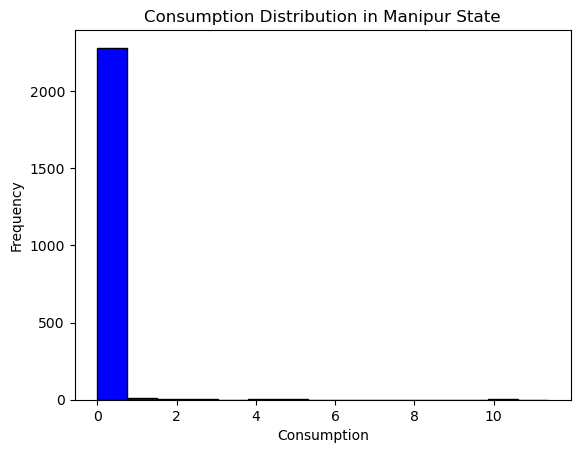

In [66]:
# Histogram to show the distribution of total consumption across different districts
plt.hist(MANPRnew['total_consumption'], bins= 15, color='blue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Consumption Distribution in Manipur State')
plt.show()

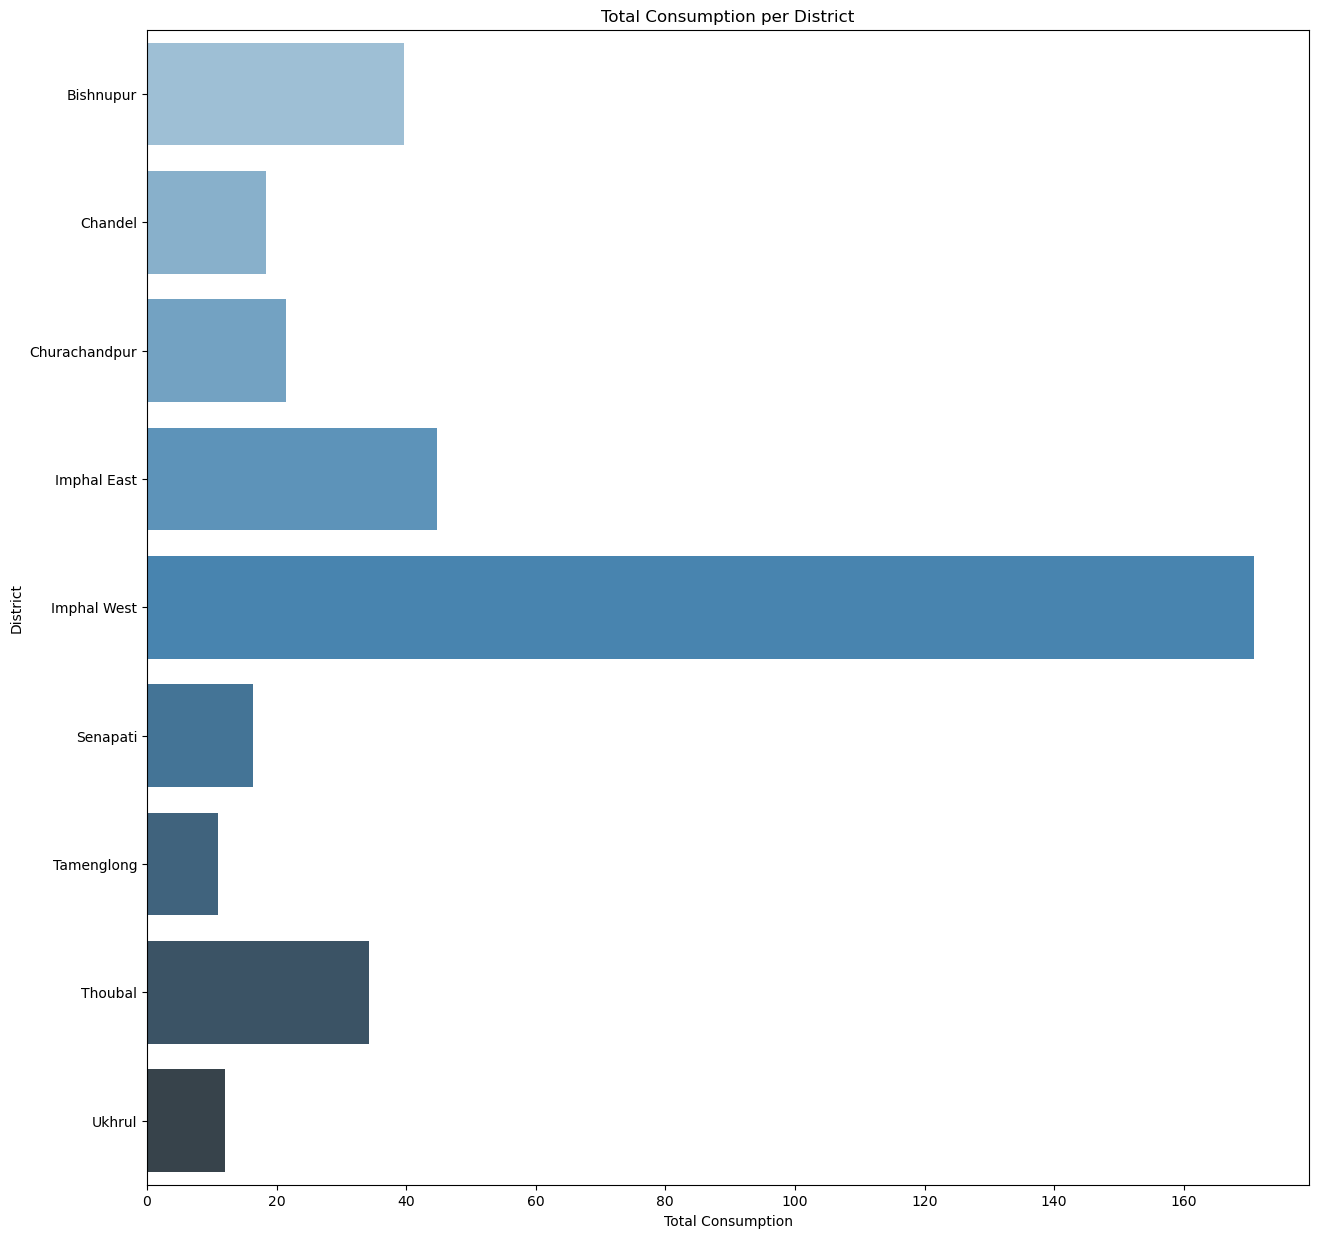

In [25]:
# Barplot to visualize consumption per district with district names
plt.figure(figsize=(15, 15))
sns.barplot(x='total_consumption', y='District', data=MANPR_consumption, palette='Blues_d')
plt.xlabel('Total Consumption')
plt.ylabel('District')
plt.title('Total Consumption per District')
plt.show()

In [33]:
# b) Plotting total consumption on the Karnataka state map

# Filtering for Karnataka
df_ka = data[data['state_1'] == "KA"]

# Sub-setting the data
ka_new = df_ka[['state_1', 'District', 'Region', 'Sector', 'State_Region', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]


In [34]:
# Check for missing values in the subset
print("Missing Values in Subset:")
print(ka_new.isnull().sum())

# Impute missing values with mean for specific columns
ka_new['Meals_At_Home'].fillna(ka_new['Meals_At_Home'].mean(), inplace=True)

# Check for missing values after imputation
print("Missing Values After Imputation:")
print(ka_new.isnull().sum())

Missing Values in Subset:
state_1                 0
District                0
Region                  0
Sector                  0
State_Region            0
Meals_At_Home          59
ricepds_v               0
Wheatpds_q              0
chicken_q               0
pulsep_q                0
wheatos_q               0
No_of_Meals_per_day     0
dtype: int64
Missing Values After Imputation:
state_1                0
District               0
Region                 0
Sector                 0
State_Region           0
Meals_At_Home          0
ricepds_v              0
Wheatpds_q             0
chicken_q              0
pulsep_q               0
wheatos_q              0
No_of_Meals_per_day    0
dtype: int64


C:\Users\jyoth\AppData\Local\Temp\ipykernel_6908\4012509499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ka_new['Meals_At_Home'].fillna(ka_new['Meals_At_Home'].mean(), inplace=True)


In [35]:
# Remove outliers
for col in outlier_columns:
    ka_new = remove_outliers(ka_new, col)

In [77]:
# Summarize consumption
ka_new['total_consumption'] = ka_new[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

district_summary = ka_new.groupby('District')['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)
print("District Consumption Summary:")
print(district_summary)


District Consumption Summary:
            District  total_consumption
2          Bangalore        2281.357870
3           Belagavi        2174.372053
21            Mysuru        1479.373753
25          Tumakuru        1441.823070
16        Kalaburagi        1332.916755
1            Ballari        1302.404203
11        Davanagere        1214.228730
27    Uttara Kannada        1198.843083
28        Vijayapura        1074.834615
24        Shivamogga        1059.634816
20            Mandya        1053.904167
14            Hassan        1015.792560
8     Chikkamagaluru         992.455833
0          Bagalkote         923.939246
12           Dharwad         901.403968
9        Chitradurga         827.296829
15            Haveri         812.777516
18             Kolar         792.061729
7    Chikkaballapura         781.763333
6    Chamarajanagara         777.135595
23        Ramanagara         736.295310
26             Udupi         709.974567
5              Bidar         657.904545
10  Dakshi

In [80]:
# Mapping districts so that merging of the tables will be easier
district_mapping = {
    "1": "Belagavi", "2": "Bagalkote", "3": "Vijayapura", "4": "Kalaburagi", "5": "Bidar",
    "6": "Raichur", "7": "Koppal", "8": "Gadag", "9": "Dharwad", "10": "Uttara Kannada",
    "11": "Haveri", "12": "Ballari", "13": "Chitradurga", "14": "Davanagere", "15": "Shivamogga",
    "16": "Udupi", "17": "Chikkamagaluru", "18": "Tumakuru", "19": "Kolar", "20": "Bangalore",
    "21": "Bengaluru Rural", "22": "Mandya", "23": "Hassan", "24": "Dakshina Kannada", 
    "25": "Kodagu", "26": "Mysuru", "27": "Chamarajanagara", "28": "Ramanagara", "29": "Chikkaballapura"
}

ka_new['District'] = ka_new['District'].astype(str).map(district_mapping).fillna(ka_new['District'])
print(ka_new)

      state_1    District  Region  Sector  State_Region  Meals_At_Home  \
23109      KA  Davanagere       4       2           294           54.0   
23110      KA  Davanagere       4       2           294           30.0   
23111      KA  Davanagere       4       2           294           60.0   
23112      KA  Davanagere       4       2           294           60.0   
23113      KA  Davanagere       4       2           294           58.0   
...       ...         ...     ...     ...           ...            ...   
64086      KA  Vijayapura       4       1           294           90.0   
64087      KA  Vijayapura       4       1           294           90.0   
64088      KA  Vijayapura       4       1           294           90.0   
64089      KA  Vijayapura       4       1           294           90.0   
64090      KA  Vijayapura       4       1           294           90.0   

       ricepds_v  Wheatpds_q  chicken_q  pulsep_q  wheatos_q  \
23109       12.0    0.714286   0.071429  0.0000

In [81]:
# ka_consumption stores aggregate of total consumption district-wise
ka_consumption = ka_new.groupby('District')['total_consumption'].sum().reset_index()
print(ka_consumption)

            District  total_consumption
0          Bagalkote         923.939246
1            Ballari        1302.404203
2          Bangalore        2281.357870
3           Belagavi        2174.372053
4    Bengaluru Rural         465.970635
5              Bidar         657.904545
6    Chamarajanagara         777.135595
7    Chikkaballapura         781.763333
8     Chikkamagaluru         992.455833
9        Chitradurga         827.296829
10  Dakshina Kannada         641.593523
11        Davanagere        1214.228730
12           Dharwad         901.403968
13             Gadag         468.564448
14            Hassan        1015.792560
15            Haveri         812.777516
16        Kalaburagi        1332.916755
17            Kodagu         440.578030
18             Kolar         792.061729
19            Koppal         595.833730
20            Mandya        1053.904167
21            Mysuru        1479.373753
22           Raichur         641.353694
23        Ramanagara         736.295310


In [58]:
# Load and plot Karnataka state map
data_map = gpd.read_file('D:\\Assignments_SCMA632\\KARNATAKA_DISTRICTS.geojson')

data_map = data_map.rename(columns={'dtname': 'District'})
print(data_map)

            District     stname stcode11 dtcode11 year_stat  Shape_Length  \
0              Bidar  KARNATAKA       29      558    2011_c  5.763814e+05   
1         Kalaburagi  KARNATAKA       29      579    2011_c  9.402528e+05   
2           Belagavi  KARNATAKA       29      555    2011_c  1.141905e+06   
3             Yadgir  KARNATAKA       29      580    2011_c  5.757503e+05   
4          Bagalkote  KARNATAKA       29      556    2011_c  6.962757e+05   
5            Raichur  KARNATAKA       29      559    2011_c  5.702024e+05   
6             Koppal  KARNATAKA       29      560    2011_c  5.642314e+05   
7              Gadag  KARNATAKA       29      561    2011_c  5.878944e+05   
8            Ballari  KARNATAKA       29      565    2011_c  8.165962e+05   
9            Dharwad  KARNATAKA       29      562    2011_c  4.889970e+05   
10    Uttara Kannada  KARNATAKA       29      563    2011_c  8.070482e+05   
11            Haveri  KARNATAKA       29      564    2011_c  4.879748e+05   

In [21]:
# Merging ka_consumption and data_map tables
data_map_data = data_map.merge(ka_consumption, on='District')
print(data_map_data)

            District     stname stcode11 dtcode11 year_stat  Shape_Length  \
0              Bidar  KARNATAKA       29      558    2011_c  5.763814e+05   
1         Kalaburagi  KARNATAKA       29      579    2011_c  9.402528e+05   
2           Belagavi  KARNATAKA       29      555    2011_c  1.141905e+06   
3          Bagalkote  KARNATAKA       29      556    2011_c  6.962757e+05   
4            Raichur  KARNATAKA       29      559    2011_c  5.702024e+05   
5             Koppal  KARNATAKA       29      560    2011_c  5.642314e+05   
6              Gadag  KARNATAKA       29      561    2011_c  5.878944e+05   
7            Ballari  KARNATAKA       29      565    2011_c  8.165962e+05   
8            Dharwad  KARNATAKA       29      562    2011_c  4.889970e+05   
9     Uttara Kannada  KARNATAKA       29      563    2011_c  8.070482e+05   
10            Haveri  KARNATAKA       29      564    2011_c  4.879748e+05   
11       Chitradurga  KARNATAKA       29      566    2011_c  7.016855e+05   

In [87]:
import geopandas as gpd
import matplotlib.pyplot as plt

NameError: name 'data_map_data' is not defined

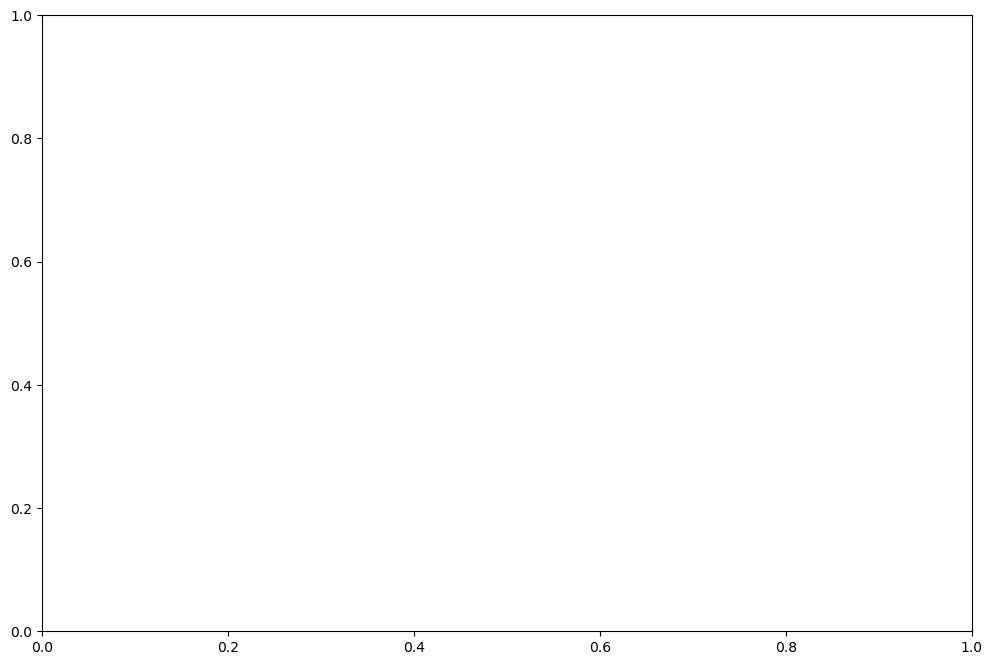

In [88]:
# Plot with labeled district names
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
data_map_data.plot(column='total_consumption', cmap='OrRd', legend=True, ax=ax, legend_kwds={'label': "Total Consumption by District"})
data_map_data.apply(lambda x: ax.annotate(text=x['District'], xy=x.geometry.centroid.coords[0], ha='center', fontsize=8, color='black'), axis=1)
plt.title('Total Consumption by District')
plt.show()